In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

### Now you can get extra information for the profiler if you activate pass verbose= True to optimus

In [3]:
# Create optimus
from optimus import Optimus
op = Optimus(master="local[*]", app_name = "optimus" , checkpoint= True)

C:\Users\argenisleon\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable

    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 


In [4]:
df = op.load.csv("data/Meteorite_Landings.csv").h_repartition()

In [5]:
df.table(10)

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Elephant⋅Moraine⋅90232,8641,Valid,L6,16.9,Found,01/01/1990⋅12:00:00⋅AM,-76.28795,156.46841,"(-76.287950,⋅156.468410)"
Grove⋅Mountains⋅020090,30681,Valid,Martian⋅(shergottite),7.5,Found,01/01/2003⋅12:00:00⋅AM,-72.99944,75.26111,"(-72.999440,⋅75.261110)"
Northwest⋅Africa⋅891,31912,Valid,H4,70.8,Found,01/01/2001⋅12:00:00⋅AM,None,None,None
Queen⋅Alexandra⋅Range⋅93098,19187,Valid,H6,1.2,Found,01/01/1993⋅12:00:00⋅AM,-84.5757,162.56524,"(-84.575700,⋅162.565240)"
Queen⋅Alexandra⋅Range⋅94691,20322,Valid,H6,9.6,Found,01/01/1994⋅12:00:00⋅AM,-84.0,168.0,"(-84.000000,⋅168.000000)"
Meteorite⋅Hills⋅00977,16211,Valid,H5,13.2,Found,01/01/2000⋅12:00:00⋅AM,-79.68333,159.75,"(-79.683330,⋅159.750000)"
Grove⋅Mountains⋅020114,46531,Valid,L3,1.0,Found,01/01/2003⋅12:00:00⋅AM,-72.98194,75.25167,"(-72.981940,⋅75.251670)"
Pecora⋅Escarpment⋅91483,18774,Valid,H5,5.5,Found,01/01/1991⋅12:00:00⋅AM,-85.55819,-68.31586,"(-85.558190,⋅-68.315860)"
Ramlat⋅as⋅Sahmah⋅390,55656,Valid,H3.8-6,0.69,Found,01/01/2010⋅12:00:00⋅AM,20.0949,55.69318,"(20.094900,⋅55.693180)"


### Profiler dump mode (Faster). It just handle the column data type as present in the dataframe

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,72.4 MB
String,1
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,45515

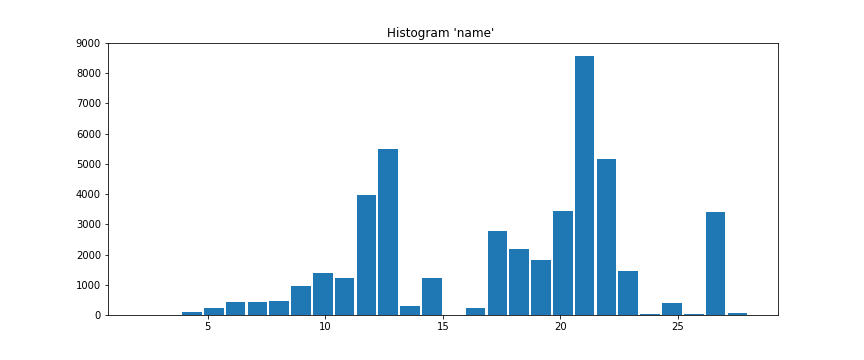
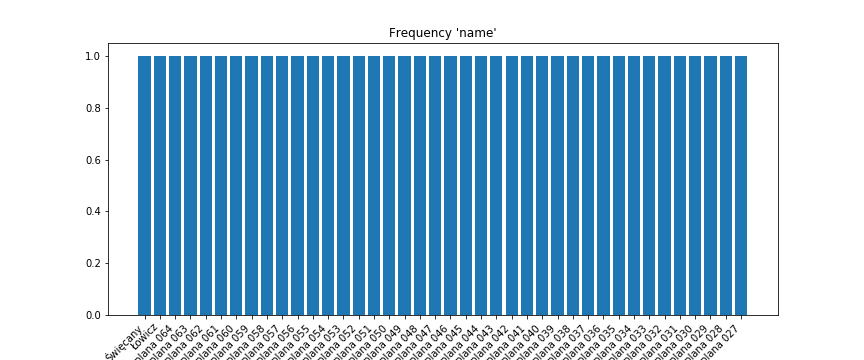

In [8]:
op.profiler.run(df, "name", infer=False, approx_count= True)

### Profiler smart mode (Slower). It just try to infer the column data type and present extra data acordinly. From example datetype columns get extra histograms about minutes, day, week and month. Also can detect array types on data.

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,99.9 MB
String,4
Numeric,4
Date,1
Bool,0
Array,1
Not available,0
Unique,45515

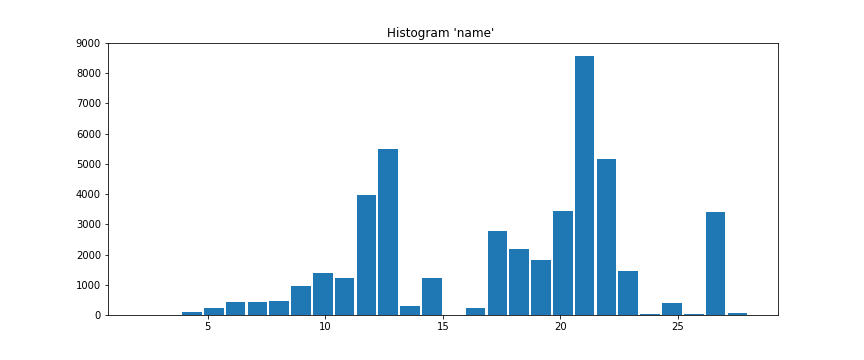
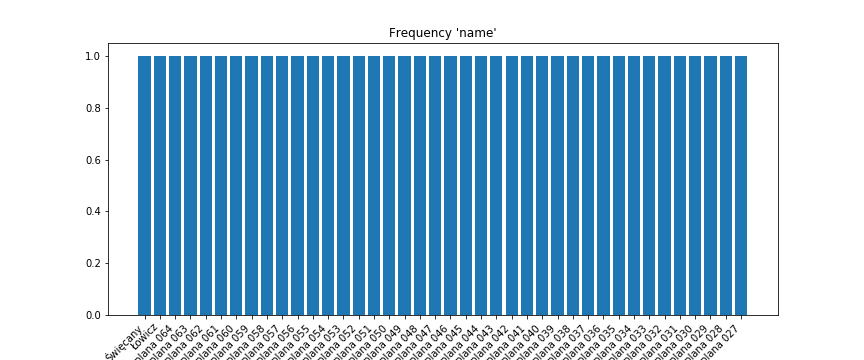
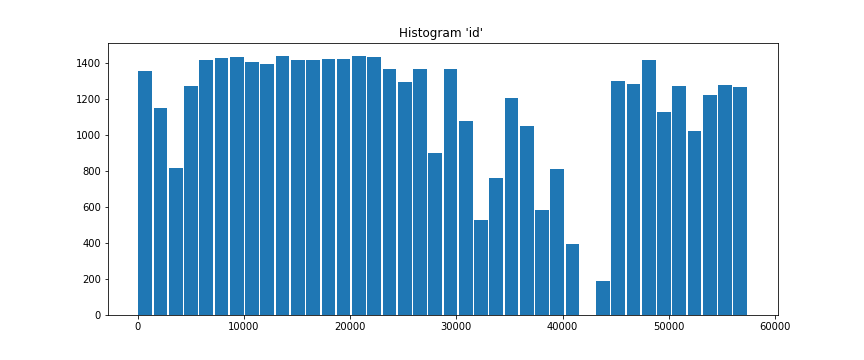
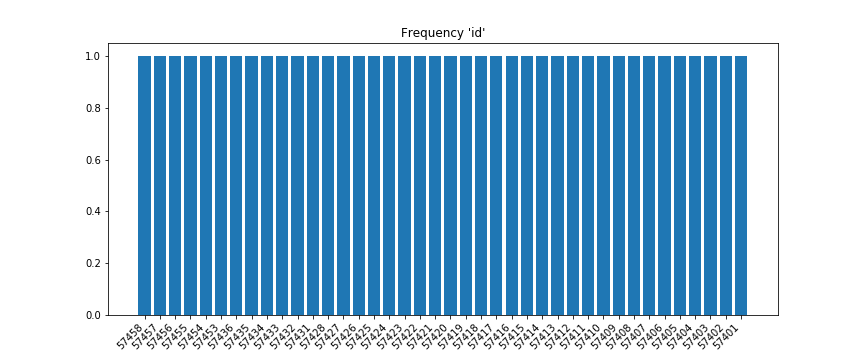
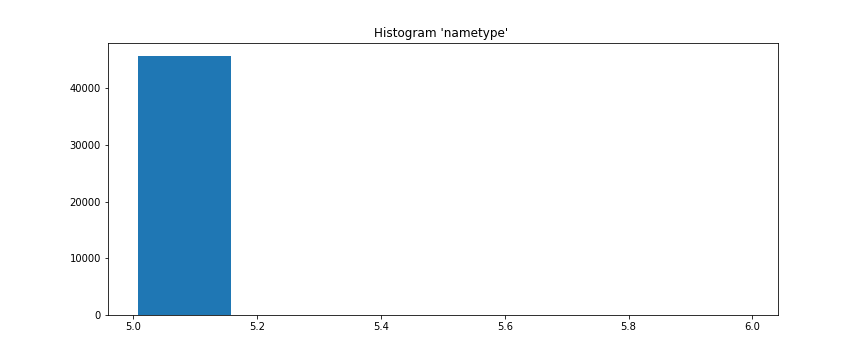
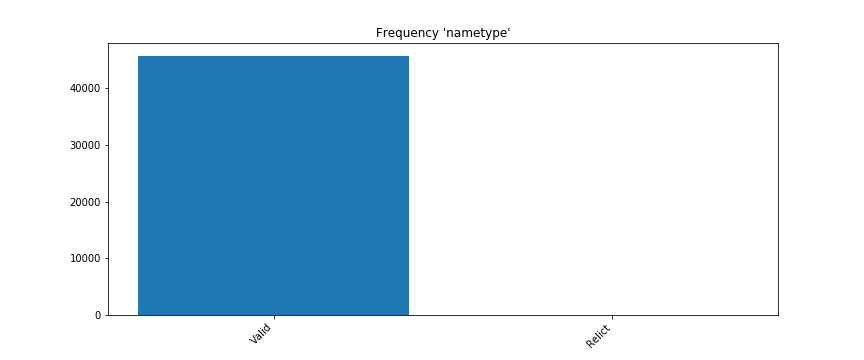
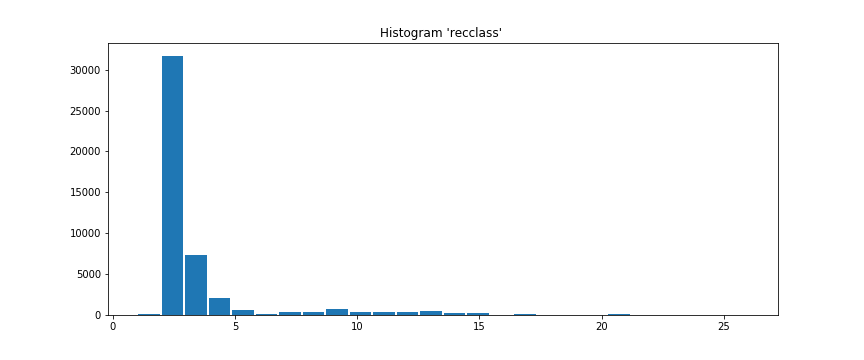
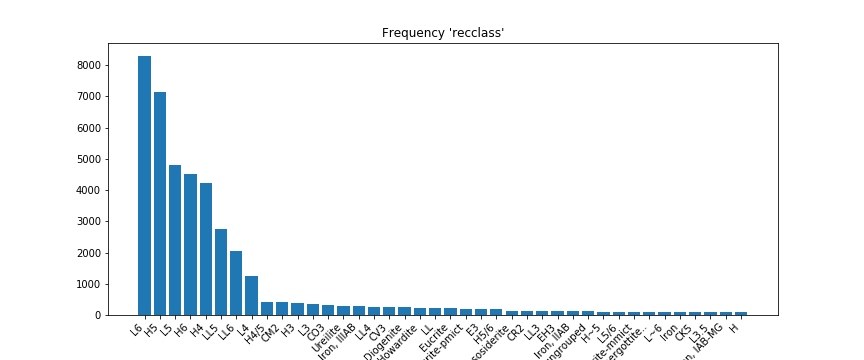
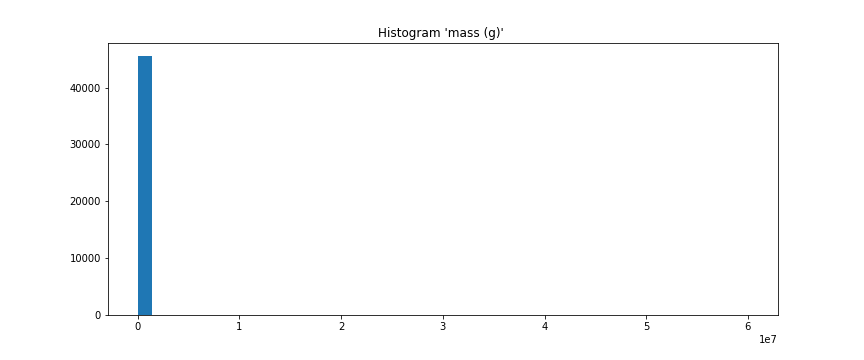
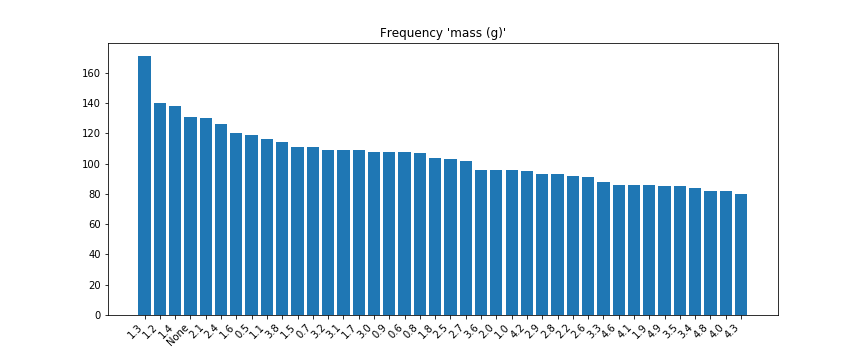
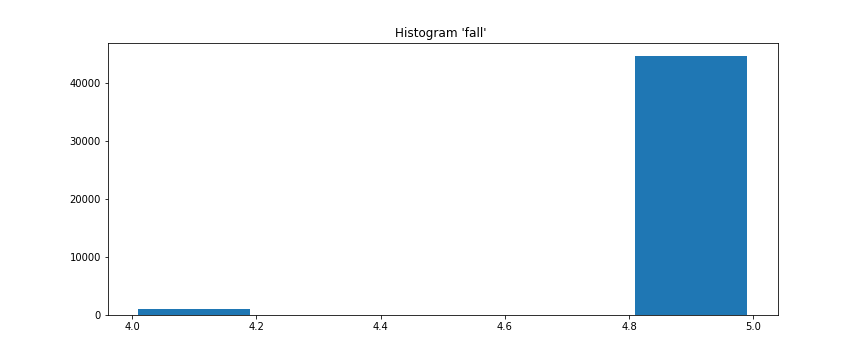
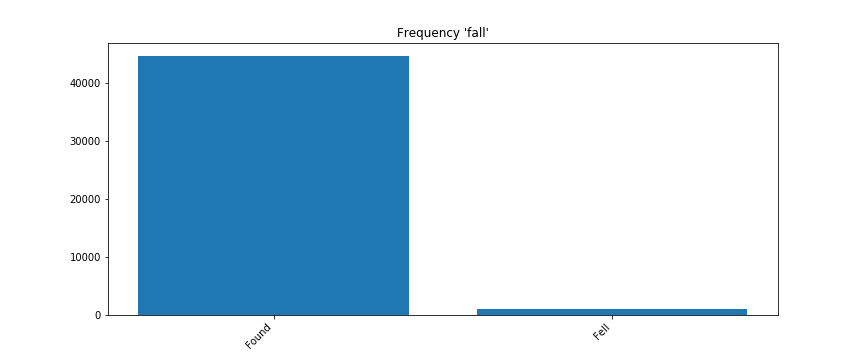
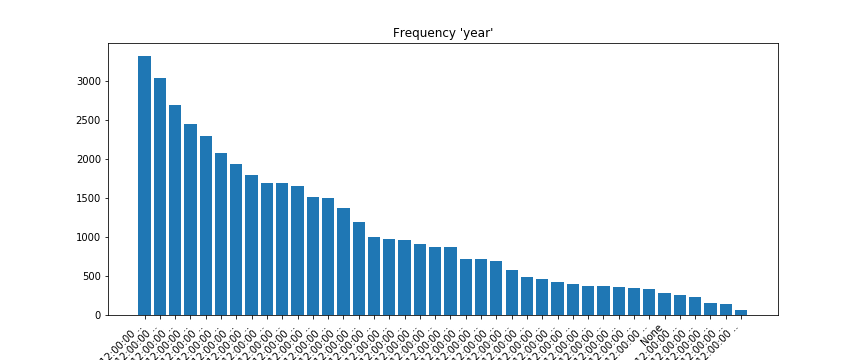
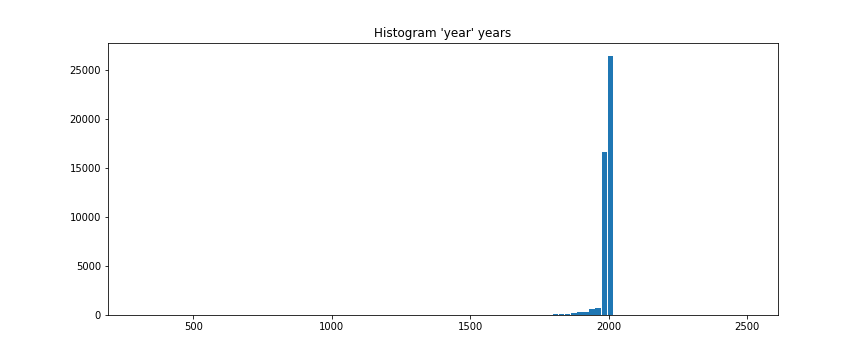
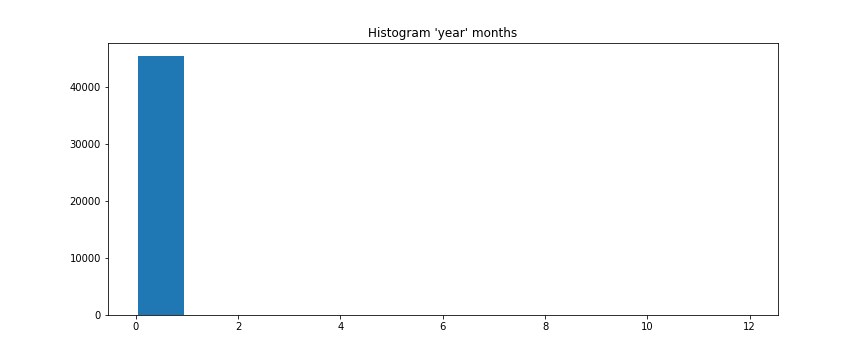
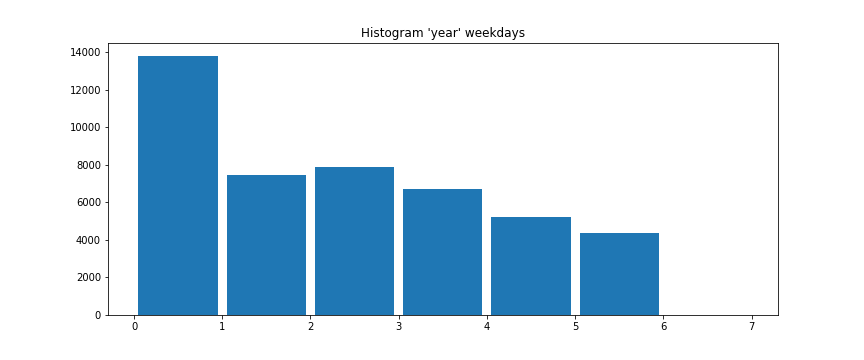
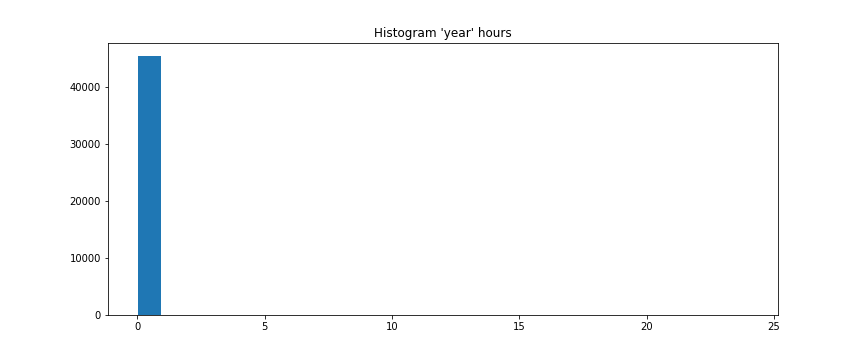
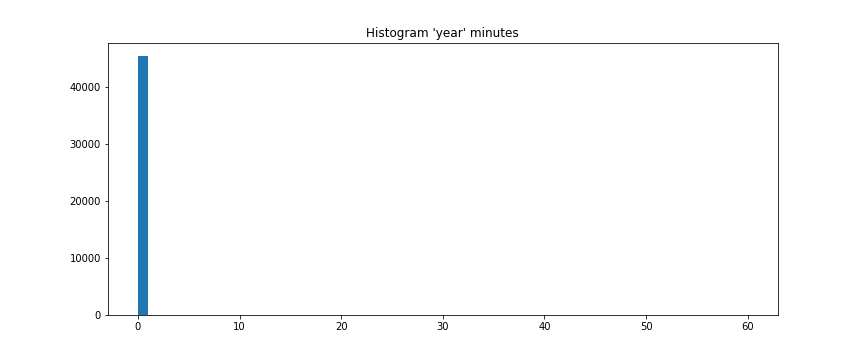
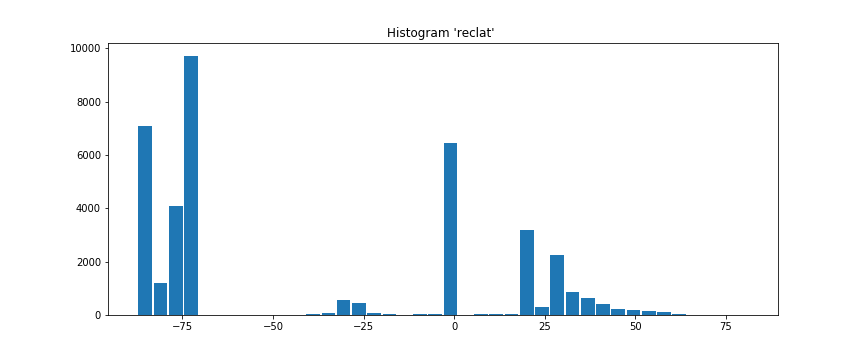
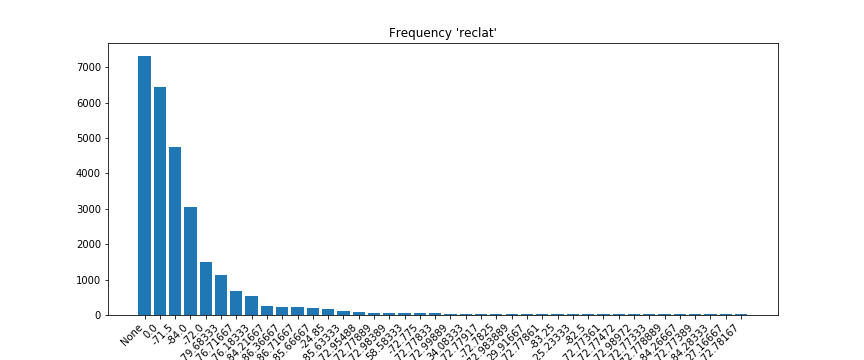
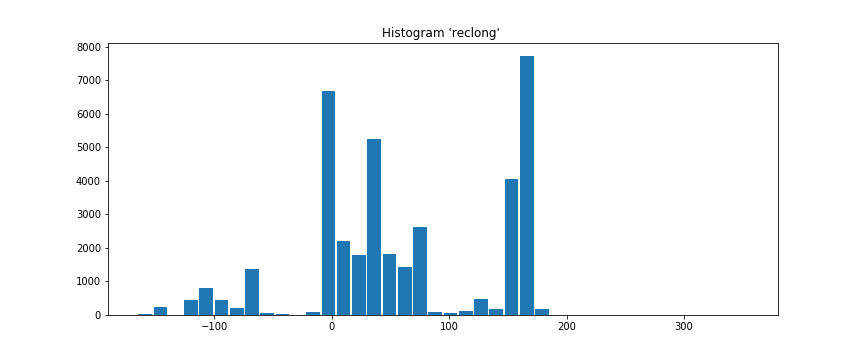
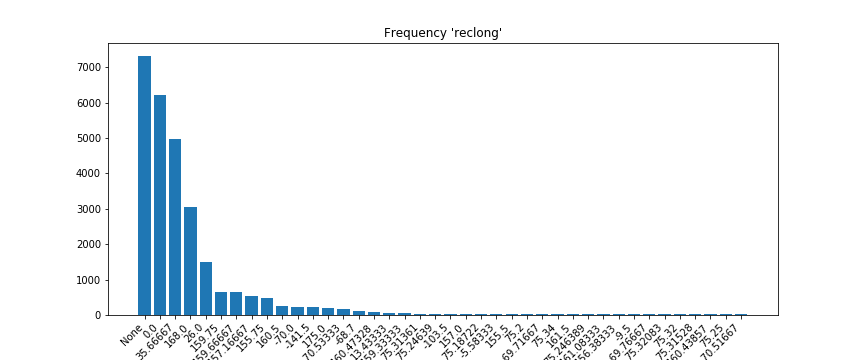
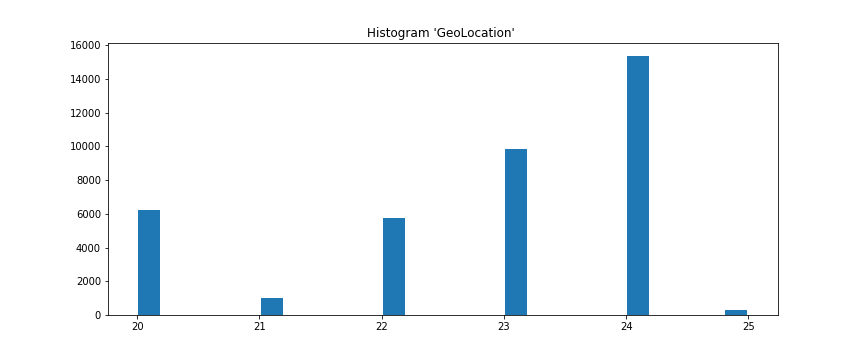
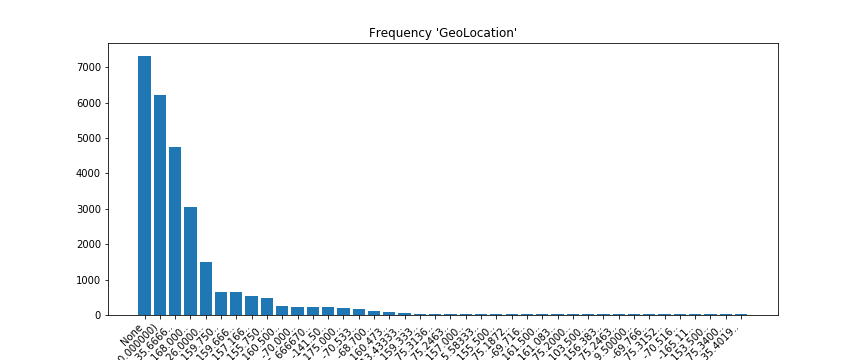

In [9]:
op.profiler.run(df, "*",infer=True)

### Plot profile for a specific column

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,103.7 MB
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,13169

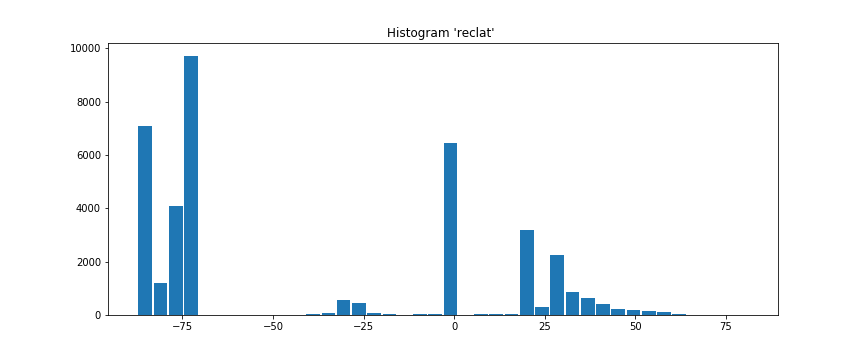
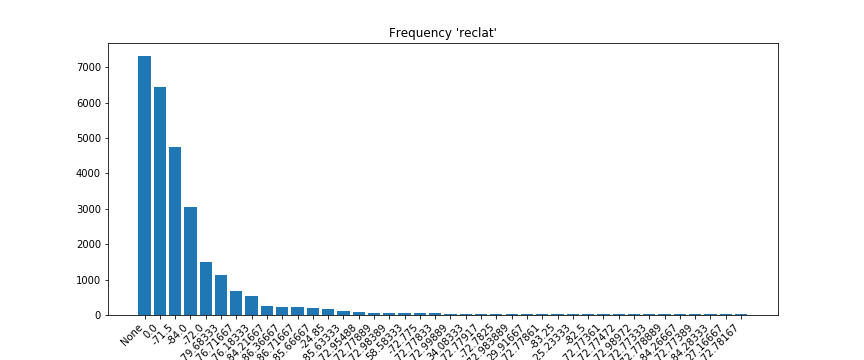

In [10]:
op.profiler.run(df, "reclat")

### Output a json file

### Plot histagram for multiple columns

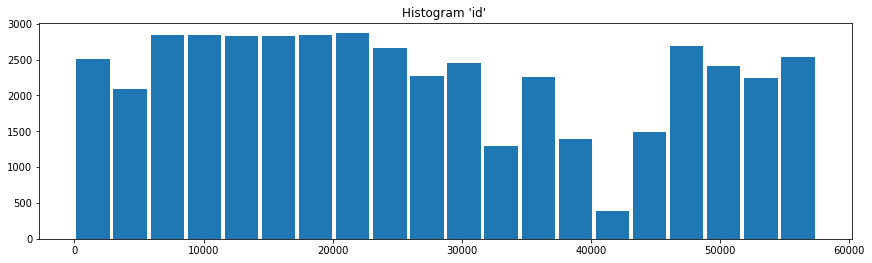

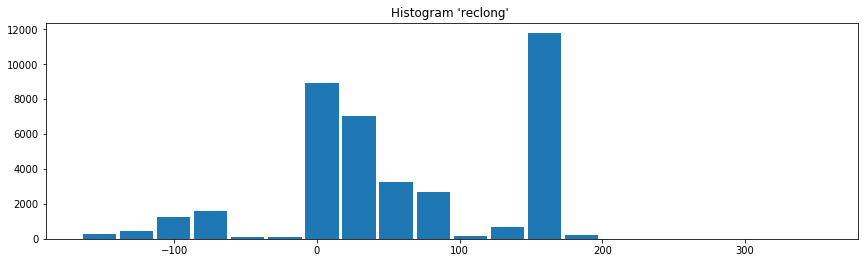

In [11]:
df.plot.hist(["id", "reclong"], 20)

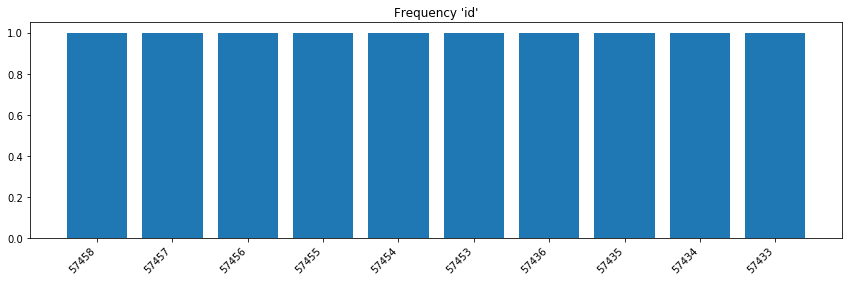

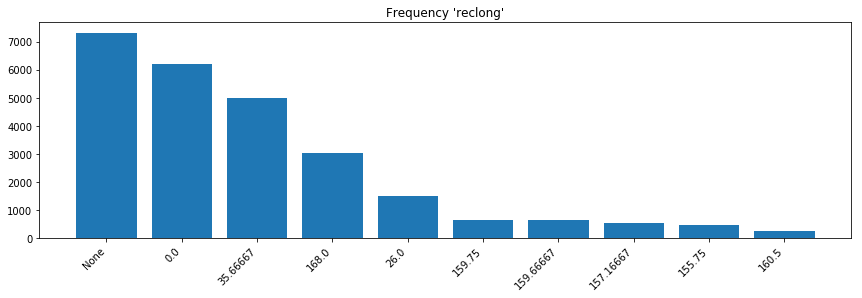

In [12]:
df.plot.frequency(["id", "reclong"], 10)

In [17]:
df.table()

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Elephant⋅Moraine⋅90232,8641,Valid,L6,16.9,Found,01/01/1990⋅12:00:00⋅AM,-76.28795,156.46841,"(-76.287950,⋅156.468410)"
Grove⋅Mountains⋅020090,30681,Valid,Martian⋅(shergottite),7.5,Found,01/01/2003⋅12:00:00⋅AM,-72.99944,75.26111,"(-72.999440,⋅75.261110)"
Northwest⋅Africa⋅891,31912,Valid,H4,70.8,Found,01/01/2001⋅12:00:00⋅AM,None,None,None
Queen⋅Alexandra⋅Range⋅93098,19187,Valid,H6,1.2,Found,01/01/1993⋅12:00:00⋅AM,-84.5757,162.56524,"(-84.575700,⋅162.565240)"
Queen⋅Alexandra⋅Range⋅94691,20322,Valid,H6,9.6,Found,01/01/1994⋅12:00:00⋅AM,-84.0,168.0,"(-84.000000,⋅168.000000)"
Meteorite⋅Hills⋅00977,16211,Valid,H5,13.2,Found,01/01/2000⋅12:00:00⋅AM,-79.68333,159.75,"(-79.683330,⋅159.750000)"
Grove⋅Mountains⋅020114,46531,Valid,L3,1.0,Found,01/01/2003⋅12:00:00⋅AM,-72.98194,75.25167,"(-72.981940,⋅75.251670)"
Pecora⋅Escarpment⋅91483,18774,Valid,H5,5.5,Found,01/01/1991⋅12:00:00⋅AM,-85.55819,-68.31586,"(-85.558190,⋅-68.315860)"
Ramlat⋅as⋅Sahmah⋅390,55656,Valid,H3.8-6,0.69,Found,01/01/2010⋅12:00:00⋅AM,20.0949,55.69318,"(20.094900,⋅55.693180)"


In [33]:
df.cols.count_na("*")

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


{'name': 0,
 'id': 0,
 'nametype': 0,
 'recclass': 0,
 'mass (g)': 131,
 'fall': 0,
 'year': 288,
 'reclat': 7315,
 'reclong': 7315,
 'GeoLocation': 7315}

In [ ]:
a = {'name': 0,
 'id': 0,
 'nametype': 0,
 'recclass': 0,
 'mass (g)': 131,
 'fall': 0,
 'year': 288,
 'reclat': 7315,
 'reclong': 7315,
 'GeoLocation': 7315}

    df.cols.dtypes()

object of type <class 'float'> cannot be safely interpreted as an integer.


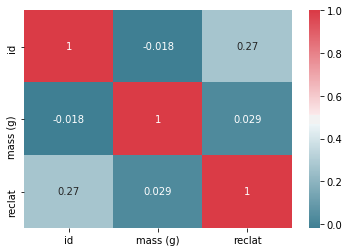

In [44]:
cols = ["id","mass (g)","reclat"]
# We drops nulls because correlation can not handle them
df_not_nulls = df.rows.drop_na(cols)

df_not_nulls.plot.correlation(cols)

In [45]:
df_not_nulls.cols.correlation(["id","mass (g)", "reclat"], output="array")

{'cols': ['id', 'mass (g)', 'reclat'],
 'data': array([[ 1.        , -0.01794746,  0.27151272],
        [-0.01794746,  1.        ,  0.02908721],
        [ 0.27151272,  0.02908721,  1.        ]])}